In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
x = data[['highway-mpg']]
y = data['price']

In [8]:
lr.fit(x,y)

LinearRegression()

In [9]:
y_pred  = lr.predict(x)
y_pred[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
lr.intercept_

38423.305858157386

In [11]:
lr.coef_

array([-821.73337832])

In [12]:
lr2 = LinearRegression()

In [13]:
x2 = data[['engine-size']]
y2 = data['price']

In [14]:
lr2.fit(x2,y2)

LinearRegression()

In [15]:
y_pred2 = lr2.predict(x2)
y_pred2[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [16]:
lr2.intercept_

-7963.338906281049

In [17]:
lr2.coef_

array([166.86001569])

In [18]:
import seaborn as sns

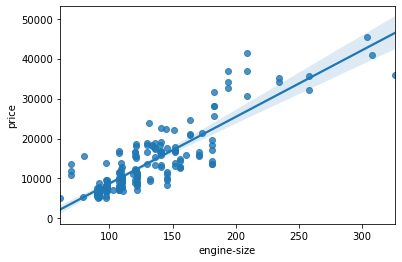

In [19]:
sns.regplot(x = data['engine-size'], y = data['price'])

In [20]:
data2 = data[['horsepower','curb-weight', 'engine-size', 'highway-mpg']]

In [21]:
lr2.fit(data2,data['price'])

LinearRegression()

In [22]:
lr2.intercept_

-15806.624626329198

In [23]:
lr2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [24]:
import seaborn as sns
%matplotlib inline

(0.0, 48168.14230929363)

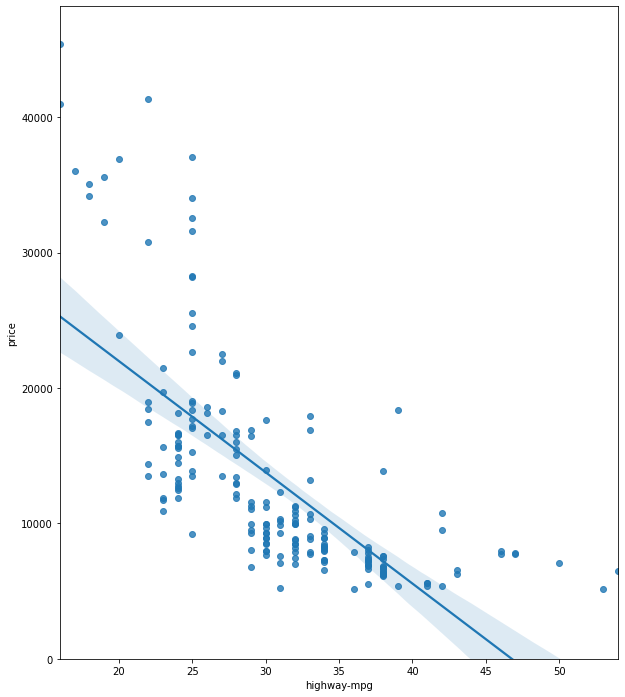

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
sns.regplot(x = 'highway-mpg',y = 'price', data=data)
plt.ylim(0,)

(0.0, 47414.1)

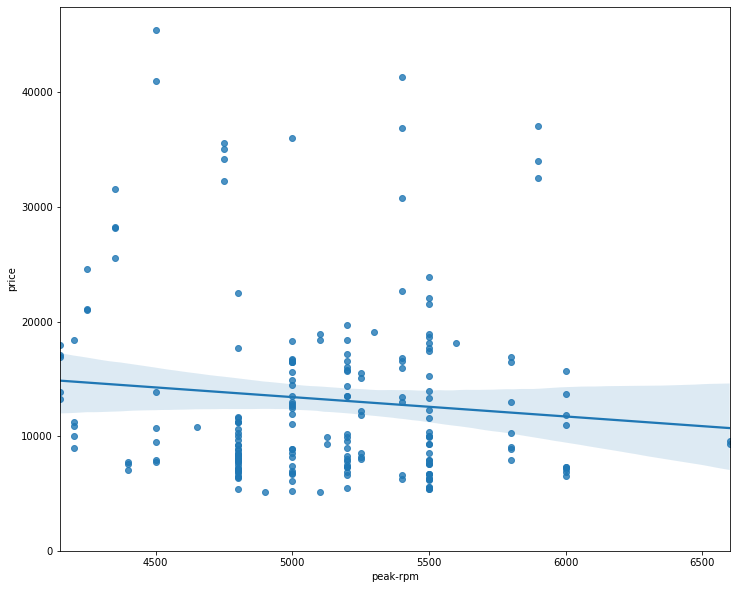

In [26]:
plt.figure(figsize=(12,10))
sns.regplot(x = 'peak-rpm', y = 'price', data=data)
plt.ylim(0,)

In [27]:
data[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


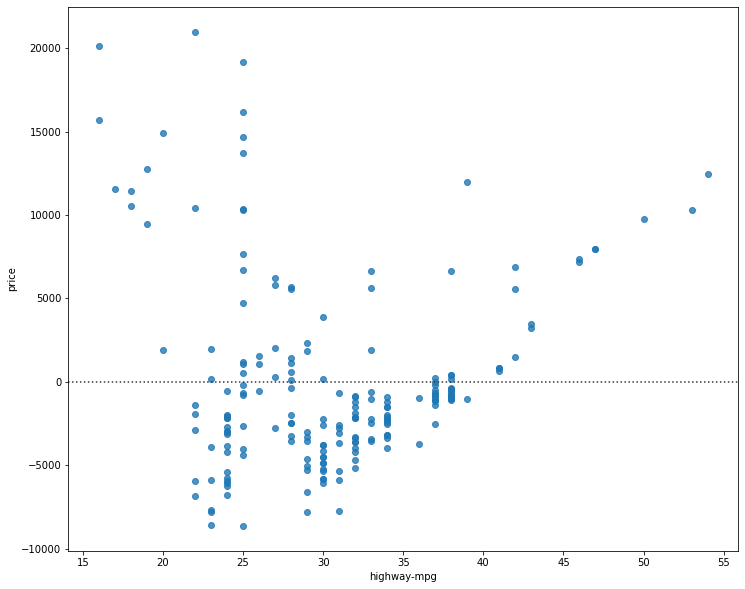

In [28]:
plt.figure(figsize = (12,10))
sns.residplot(data['highway-mpg'],data['price'])
plt.show()

In [29]:
yhat = lr2.predict(data2)
yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

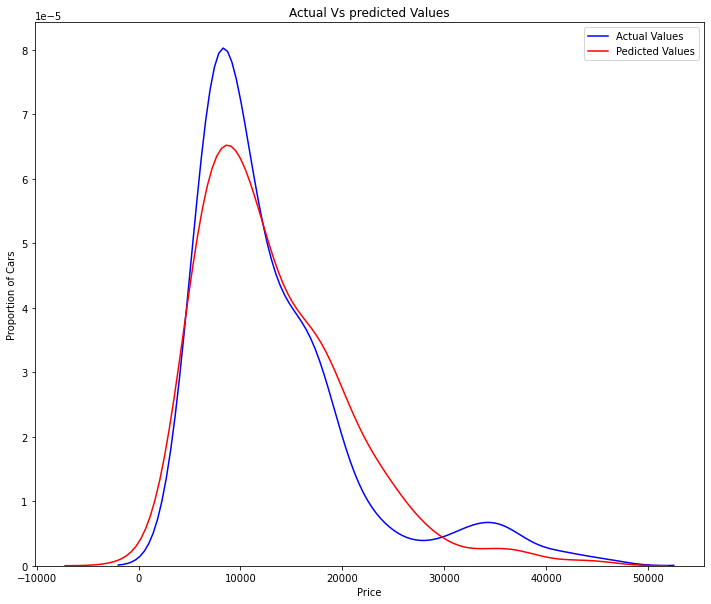

In [30]:
plt.figure(figsize = (12,10))

ax1 = sns.distplot(data['price'], hist = False, color = 'b', label = 'Actual Values')
sns.distplot(yhat, hist = False, color = 'r', label = 'Pedicted Values', ax=ax1)

plt.title('Actual Vs predicted Values')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [41]:
def plotplolly(model, independent_variable, dependent_variable,name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial Fit with matplotlib for length and price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [42]:
x = data['highway-mpg']
y = data['price']

In [43]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


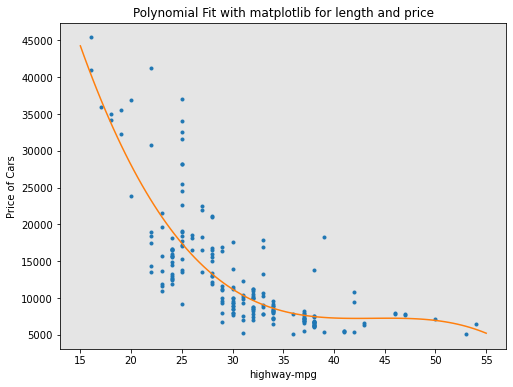

In [45]:
plt.figure(figsize = (8,6))
plotplolly(p,x,y,'highway-mpg')

In [46]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


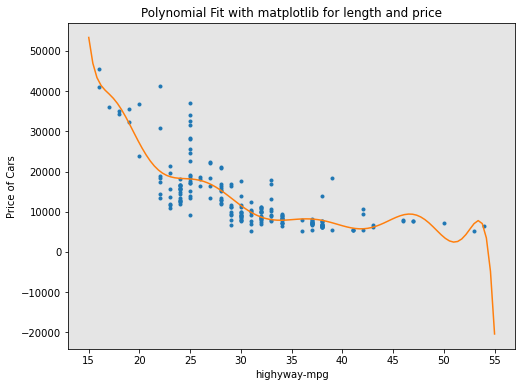

In [48]:
plt.figure(figsize = (8,6))

plotplolly(p1,x,y,'highyway-mpg')

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [51]:
data2.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


In [52]:
data2_pr = pr.fit_transform(data2)

In [53]:
data2.shape

(201, 4)

In [54]:
data2_pr.shape

(201, 15)

### Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
Input = [('Scaler',StandardScaler()),('Polynomial',PolynomialFeatures()),('Model',LinearRegression())]

In [64]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Polynomial', PolynomialFeatures()),
                ('Model', LinearRegression())])

In [65]:
pipe.fit(data2,data['price'])

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Polynomial', PolynomialFeatures()),
                ('Model', LinearRegression())])

In [66]:
y_pipe = pipe.predict(data2)
y_pipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [67]:
data['price'][0:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [71]:
Input1 = [('Scaler',StandardScaler()),('Model',LinearRegression())]

In [72]:
pipe2 = Pipeline(Input1)
pipe2

Pipeline(steps=[('Scaler', StandardScaler()), ('Model', LinearRegression())])

In [74]:
pipe2.fit(data2,data['price'])

Pipeline(steps=[('Scaler', StandardScaler()), ('Model', LinearRegression())])

In [75]:
y_pipe2 = pipe2.predict(data2)
y_pipe2[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

#### Linear Regression Model Evaluation

In [80]:
x = data[['highway-mpg']]
y = data['price']

In [81]:
lr.score(x,y)

0.4965911884339175

In [82]:
y_predd = lr.predict(x)
y_predd[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

###### mean squared error

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(y,y_predd)

31635042.944639895

#### Multiple Linear Regression Model  Evaluation 

In [86]:
lr2.score(data2,y)

0.8093562806577457

In [87]:
y_pred_mlr = lr2.predict(data2)
y_pred_mlr[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [88]:
data['price'][0:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [90]:
mean_squared_error(y,y_pred_mlr)

11980366.87072649

#### Polynomial Fit

In [91]:
from sklearn.metrics import r2_score

In [92]:
r_squared = r2_score(y,p(x))

In [93]:
r_squared

0.6741946663906513

In [94]:
mean_squared_error(y,p(x))

20474146.42636125

##### Conclusion:  Multiple Linear Regression is going to be a good fit